In [1]:
from ES import ES
import numpy as np
import matplotlib.pyplot as plt

from itertools import accumulate

## Zadanie 4. 
a) Zapoznaj się z problemem kinematyki odwrotnej
(Inverse Kinematics Problem).

b) W dalszej części zadania skup się na uproszczonym problemie omówionym na wykładzie, tzn.:
- rozpatrujemy ramię robota, przymocowane do podłoża w punkcie A, złożone z K sztywnych segmentów prostoliniowych S1, S2, ..., SK, o ustalonych długościach l1, l2, ..., lK,
- ramię może wyginać się w przegubach zmieniając kąt αk pod którym łączą się dwa kolejne segmenty Sk i Sk-1 (przez S0 oznaczmy podłoże), k = 1, 2, ..., K,
- dla każdego kąta αk dany jest przedział [ak, bk] ograniczający zakres jego wartości, k = 1, 2, ..., K,
- dany jest punkt docelowy B,
- zadanie polega na wyznaczeniu wartości kątów α1, α2, ..., αK w taki sposób, aby ramię robota znalazło się jak najbliżej punktu docelowego.

c) Napisz algorytm ewolucyjny rozwiązujący problem kinematyki odwrotnej określony w punkcie b. Stwórz przykładowe zestawy danych wejściowych opisujących problem o różnej wielkości i różnym poziomie trudności. Dokładnie przeanalizuj działanie algorytmu i otrzymane wyniki. Sprawdź różne ustawienia algorytmu.


In [2]:
def cost_func(population, l, dest):
    res = np.zeros(len(population))
    for i, angles in enumerate(population[:,0]):
        angles = list(accumulate(angles))
        p = np.array([sum(l*np.sin(angles)), sum(l*np.cos(angles))])
        res[i] = np.sqrt(((p-dest)**2).sum())
    return res

In [3]:
def draw(ind, l, dest):
    plt.figure()
    s = np.array([0, 0])
    plt.scatter(0, 0, c='black', s=100)
    plt.scatter(dest[1], dest[0], c='r', s=100)
    s_angs = 0
    for i, ang in enumerate(ind[0]):
        s_angs += ang
        e = s + np.array([l[i]*np.sin(s_angs), l[i]*np.cos(s_angs)])
        plt.plot([s[1], e[1]], [s[0], e[0]], c='black')
        s = e
        plt.scatter(s[1], s[0], c='black', s=30)
    plt.axis('equal')
    plt.show()

In [4]:
def inverse_kin(l, dest, domain=(-10*np.pi, 10*np.pi), max_iters=100):
    d = len(l)
    
    tau, tau0 = 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d))
    es = ES(domain=domain, init_domain=(max(domain[0], 0), min(domain[1], 2*np.pi)), dims=d, cost_func=lambda pop: cost_func(pop, l, dest), tau=tau, tau0=tau0, max_iters=max_iters)
    es.run()
    
    draw(es.best_ind, l, dest)
    print(f'cost func: {es.iter_min.min():.5}\nbest: {es.best_ind[0]}')

100%|██████████| 100/100 [00:04<00:00, 21.29it/s]


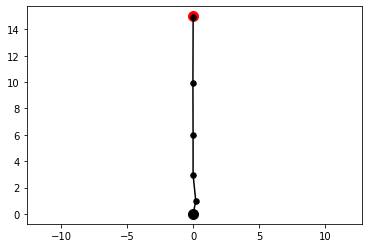

cost func: 0.030869
best: [ 1.36907854e+00  6.58761353e+00  6.18064535e+00  6.28600035e+00
 -6.51819119e-03]


In [5]:
inverse_kin(np.array([1, 2, 3, 4, 5]), np.array([15, 0]))

100%|██████████| 100/100 [00:04<00:00, 22.46it/s]


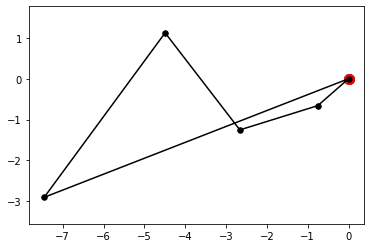

cost func: 6.3842e-11
best: [3.86103003 5.86526709 5.06705324 1.85136931 2.576339  ]


In [6]:
inverse_kin(np.array([1, 2, 3, 5, 8]), np.array([0, 0]))

#### Randomly generated problem with 50 segments

100%|██████████| 500/500 [00:31<00:00, 15.65it/s]


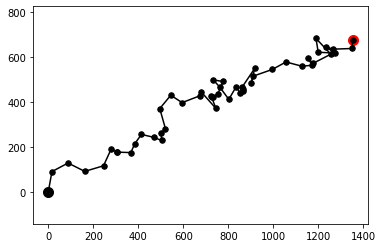

cost func: 0.0
best: [ 1.39025336  5.38005669  5.33192422  0.75518093  0.85132467  4.62188974
  0.20761801  6.55937788  1.1972649   6.0700803   5.10275119  6.12981311
  2.02623525  5.4609259   1.02541322  5.31869833  4.82002518  7.23368901
  0.87554299  4.19667052  2.77516485  3.24803064  0.99369512  0.65859096
  6.89293388  8.11839218  2.44514109 -0.08917187  8.26082517 -2.01577241
  1.65742501  0.81434712  0.28801427  5.47415335  3.50385482  3.05962193
  5.36140627  0.16293373  5.52221928  6.64803056  1.99844834  3.38885867
  7.55216268  1.84903227  2.54338002  1.36226357  2.62345997  3.42305874
  0.32274853  1.46556415]


In [7]:
l = np.random.randint(100, size=50)+1
dest = np.array([l.sum()/4, l.sum()/2])
inverse_kin(l, dest, max_iters=500)

#### Angles in (0, 90) degree

100%|██████████| 500/500 [00:24<00:00, 20.58it/s]


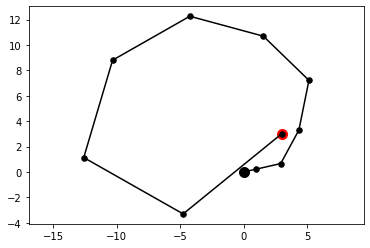

cost func: 0.0
best: [0.21510009 0.008775   0.84960147 0.29768323 1.00100059 0.5047401
 0.78181678 0.76572988 1.34281192 1.19857005]


In [8]:
l = np.arange(10)+1
dest = np.array([3, 3])
inverse_kin(l, dest, domain=(0, np.pi/2), max_iters=500)